<a href="https://colab.research.google.com/github/harshav1989/Naan_mudhalvan_ads_3512/blob/main/ADS_PHASE5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression RMSE: 336.66772000000003
Classification Report:
              precision    recall  f1-score   support

        8438       0.00      0.00      0.00         0
        8555       0.00      0.00      0.00         2
        8562       0.00      0.00      0.00         4
        8869       0.25      0.17      0.20         6
        8911       0.00      0.00      0.00         4
        8991       0.00      0.00      0.00         3
        9043       0.00      0.00      0.00         3
        9092       0.25      0.25      0.25         4
        9112       0.12      0.25      0.17         4
        9132       0.00      0.00      0.00         0

    accuracy                           0.10        30
   macro avg       0.06      0.07      0.06        30
weighted avg       0.10      0.10      0.10        30



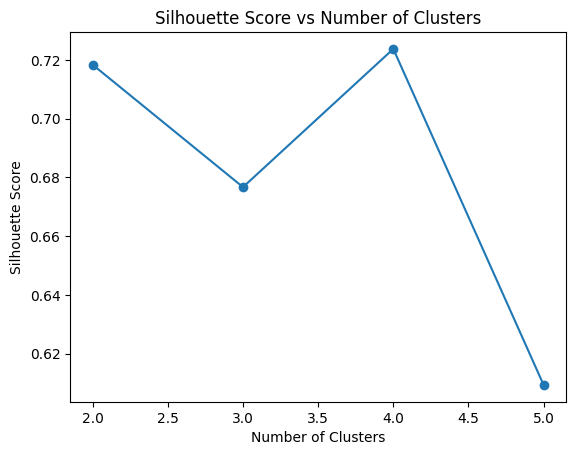

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings  # Import the warnings module

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Load and preprocess the dataset
data = pd.read_csv("/content/sample.csv")  # Replace with your data file path

# Preprocess data (handle missing values, feature extraction, etc.)
data.fillna(0, inplace=True)  # Replace missing values with zeros

# Feature Engineering
data['Feature3'] = data['Total Price'] - data['Base Price']
data['Feature4'] = data['Units Sold'] / (data['Base Price'] + 1)

# Clustering
clustering_features = data[['Total Price', 'Base Price']]
range_clusters = range(2, 6)  # Reducing the range of clusters for faster results

best_silhouette = -1
best_num_clusters = 2

# Lists to store silhouette scores for plotting
silhouette_scores = []

# Parallelized K-Means clustering
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(clustering_features)
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_num_clusters = num_clusters

data['Cluster'] = kmeans.fit_predict(clustering_features)

# Feature engineering
data['Feature5'] = data['Total Price'] / data['Units Sold']

# Model training for Regression
X_reg = data[['Feature3', 'Feature4', 'Feature5']]
y_reg = data['Units Sold']  # Replace with your target variable for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

reg_model = RandomForestRegressor(n_estimators=50, random_state=0)  # Tune the number of estimators
reg_model.fit(X_train_reg, y_train_reg)

# Predict demand using the regression model
y_pred_reg = reg_model.predict(X_test_reg)
reg_rmse = mean_squared_error(y_test_reg, y_pred_reg)

# Model training for Classification
X_class = data[['Feature3', 'Feature4', 'Feature5']]
y_class = data['Store ID']  # Replace with your target variable for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

class_model = RandomForestClassifier(n_estimators=50, random_state=0)  # Tune the number of estimators
class_model.fit(X_train_class, y_train_class)

# Suppress UndefinedMetricWarning during classification report
warnings.filterwarnings("ignore", category=UserWarning)

# Predict categories using the classification model
y_pred_class = class_model.predict(X_test_class)
class_report = classification_report(y_test_class, y_pred_class)

# Output results
print(f"Regression RMSE: {reg_rmse}")
print(f"Classification Report:\n{class_report}")

# Plot the silhouette scores
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


<Figure size 1000x600 with 0 Axes>

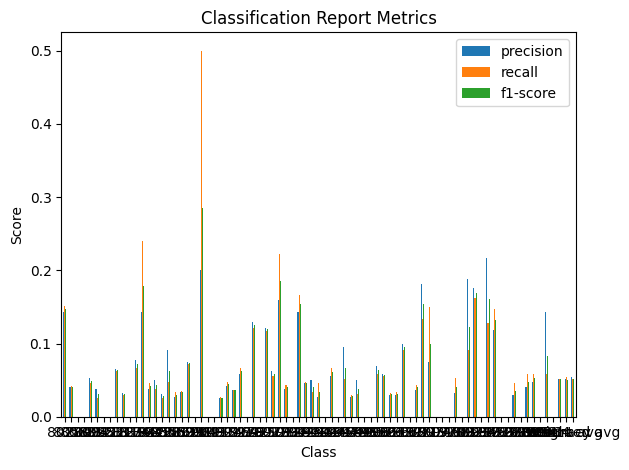

Regression RMSE: 12.02237326826583


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report

# Load the dataset
data = pd.read_csv("/content/sample2.csv")

# Feature Engineering (Placeholder: Replace with your actual feature engineering)
# Create relevant features
data['Feature1'] = data['Total Price'] / data['Base Price']
data['Feature2'] = data['Units Sold'] * data['Base Price']

# Clustering
clustering_features = data[['Total Price', 'Base Price']]
range_clusters = range(2, 6)  # Reducing the range of clusters for faster results

best_silhouette = -1
best_num_clusters = 2

# Lists to store silhouette scores for plotting
silhouette_scores = []

# Parallelized K-Means clustering
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)  # Explicitly set n_init
    cluster_labels = kmeans.fit_predict(clustering_features)
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_num_clusters = num_clusters


data['Cluster'] = kmeans.fit_predict(clustering_features)

# Feature engineering
data['Feature3'] = data['Total Price'] - data['Base Price']
data['Feature4'] = data['Units Sold'] / (data['Base Price'] + 1)
data['Feature5'] = data['Total Price'] / data['Units Sold']

# Model training for Regression
X_reg = data[['Feature3', 'Feature4', 'Feature5']]
y_reg = data['Units Sold']  # Replace with your target variable for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

reg_model = RandomForestRegressor(n_estimators=50, random_state=0)  # Tune the number of estimators
reg_model.fit(X_train_reg, y_train_reg)

# Predict demand using the regression model
y_pred_reg = reg_model.predict(X_test_reg)
reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# Model training for Classification
X_class = data[['Feature3', 'Feature4', 'Feature5']]
y_class = data['Store ID']  # Replace with your target variable for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

class_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Tune the number of estimators
class_model.fit(X_train_class, y_train_class)

# Classification Model
y_pred_class = class_model.predict(X_test_class)
class_report = classification_report(y_test_class, y_pred_class, output_dict=True)

# Visualize the classification report
report_df = pd.DataFrame(class_report).T

plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print(f"Regression RMSE: {reg_rmse}")


Regression RMSE: 55.41984581120853
Classification Report:
              precision    recall  f1-score   support

        8438       0.00      0.00      0.00         0
        8555       0.00      0.00      0.00         2
        8562       0.20      0.25      0.22         4
        8869       1.00      0.17      0.29         6
        8911       0.00      0.00      0.00         4
        8991       0.00      0.00      0.00         3
        9043       0.12      0.33      0.18         3
        9092       0.00      0.00      0.00         4
        9112       0.00      0.00      0.00         4
        9132       0.00      0.00      0.00         0

    accuracy                           0.10        30
   macro avg       0.13      0.07      0.07        30
weighted avg       0.24      0.10      0.10        30

Time Series Forecast: 149    30.005367
150    29.724142
151    29.729084
152    29.728997
153    29.728998
154    29.728998
155    29.728998
156    29.728998
157    29.728998
158    2

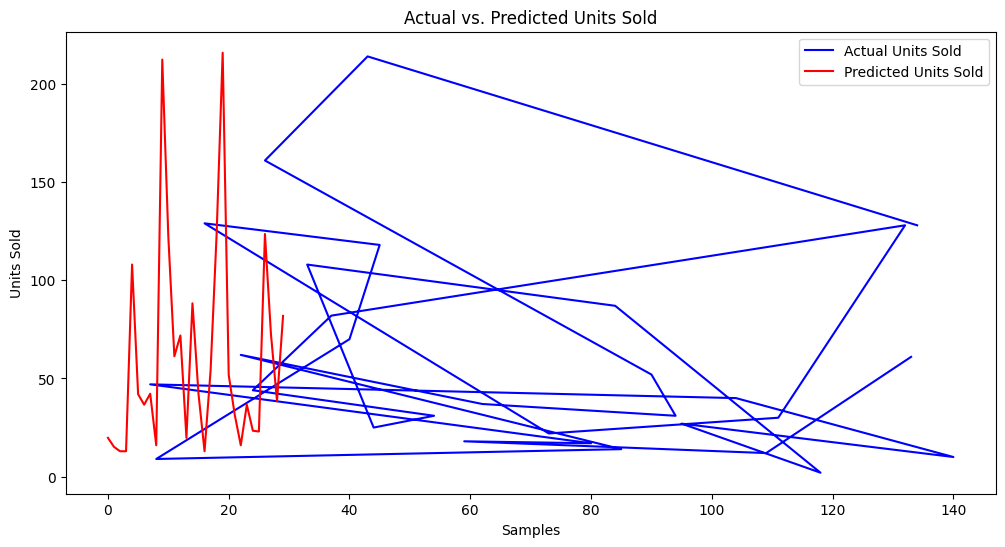

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv("/content/sample.csv")

# Feature Engineering (Placeholder: Replace with your actual feature engineering)
# Create relevant features
data['Feature1'] = data['Total Price'] / data['Base Price']
data['Feature2'] = data['Units Sold'] * data['Base Price']

# Time Series Decomposition
# Decompose the time series
result = seasonal_decompose(data['Units Sold'], model='additive', period=12)

# Clustering (Placeholder: Replace with your actual clustering features)
# Determine the optimal number of clusters using KMeans and silhouette score
X_cluster = data[['Feature1', 'Feature2']]  # Specify your clustering features
range_clusters = range(2, 10)  # Define the range of clusters to try
best_silhouette = -1
best_num_clusters = 2
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)  # Set n_init explicitly
    cluster_labels = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_num_clusters = num_clusters


kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_cluster)

# Regression Model
X_reg = data[['Total Price', 'Base Price']]
y_reg = data['Units Sold']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

reg_model = RandomForestRegressor(n_estimators=100, random_state=0)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# Classification Model
X_class = data[['Total Price', 'Base Price']]
y_class = data['Store ID']  # Replace with your actual classification target
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

class_model = RandomForestClassifier(n_estimators=100, random_state=0)
class_model.fit(X_train_class, y_train_class)
y_pred_class = class_model.predict(X_test_class)
class_report = classification_report(y_test_class, y_pred_class)

# ARIMA Time Series Forecasting
# You need to specify the ARIMA order (p, d, q) based on your data characteristics
p, d, q = 1, 1, 1  # Modify these values
model = ARIMA(data['Units Sold'], order=(p, d, q))
model_fit = model.fit()
forecast_periods = 10  # Adjust as needed
forecast = model_fit.forecast(steps=forecast_periods)

# Output results
print(f"Regression RMSE: {reg_rmse}")
print(f"Classification Report:\n{class_report}")
print(f"Time Series Forecast: {forecast}")

# Visualize the predicted demand
plt.figure(figsize=(12, 6))
plt.plot(y_test_reg, label='Actual Units Sold', color='blue')
plt.plot(y_pred_reg, label='Predicted Units Sold', color='red')
plt.title('Actual vs. Predicted Units Sold')
plt.xlabel('Samples')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Additional visualizations and plots can be added as needed.


Regression RMSE: 34.52084321173009
Classification Report:
              precision    recall  f1-score   support

        8023       0.20      0.18      0.19        33
        8058       0.00      0.00      0.00        24
        8063       0.04      0.03      0.04        29
        8091       0.00      0.00      0.00        14
        8094       0.08      0.05      0.06        43
        8095       0.00      0.00      0.00        39
        8121       0.03      0.04      0.03        28
        8218       0.00      0.00      0.00        12
        8222       0.07      0.12      0.09        32
        8317       0.00      0.00      0.00        33
        8319       0.07      0.07      0.07        14
        8392       0.19      0.20      0.19        15
        8398       0.18      0.24      0.20        25
        8400       0.06      0.09      0.07        22
        8422       0.00      0.00      0.00        26
        8438       0.25      0.07      0.12        40
        8555       0.33

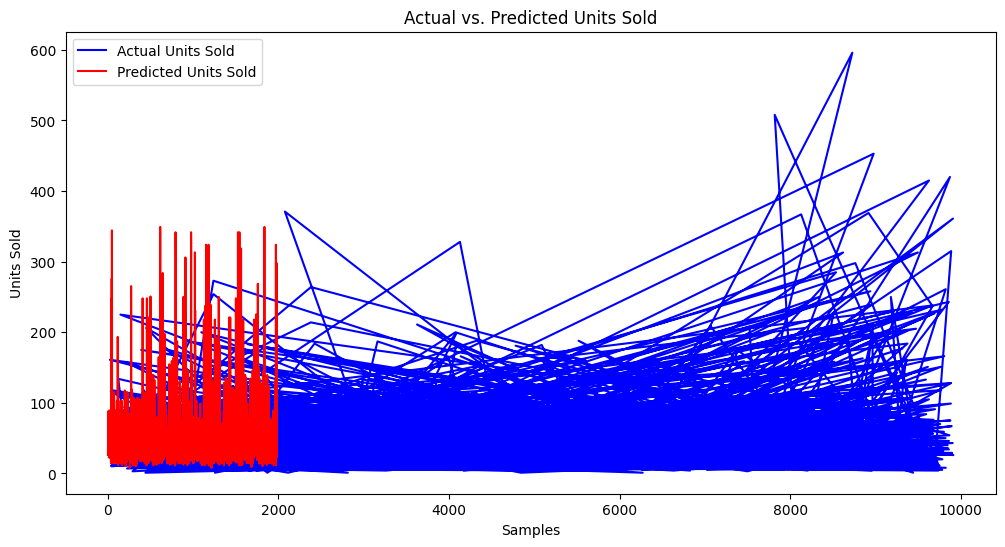

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv("/content/sample2.csv")

# Feature Engineering (Placeholder: Replace with your actual feature engineering)
# Create relevant features
data['Feature1'] = data['Total Price'] / data['Base Price']
data['Feature2'] = data['Units Sold'] * data['Base Price']

# Time Series Decomposition
# Decompose the time series
result = seasonal_decompose(data['Units Sold'], model='additive', period=12)

# Clustering (Placeholder: Replace with your actual clustering features)
# Determine the optimal number of clusters using KMeans and silhouette score
X_cluster = data[['Feature1', 'Feature2']]  # Specify your clustering features
range_clusters = range(2, 10)  # Define the range of clusters to try
best_silhouette = -1
best_num_clusters = 2
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)  # Set n_init explicitly
    cluster_labels = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_num_clusters = num_clusters


kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_cluster)

# Regression Model
X_reg = data[['Total Price', 'Base Price']]
y_reg = data['Units Sold']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

reg_model = RandomForestRegressor(n_estimators=100, random_state=0)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# Classification Model
X_class = data[['Total Price', 'Base Price']]
y_class = data['Store ID']  # Replace with your actual classification target
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

class_model = RandomForestClassifier(n_estimators=100, random_state=0)
class_model.fit(X_train_class, y_train_class)
y_pred_class = class_model.predict(X_test_class)
class_report = classification_report(y_test_class, y_pred_class)

# ARIMA Time Series Forecasting
# You need to specify the ARIMA order (p, d, q) based on your data characteristics
p, d, q = 1, 1, 1  # Modify these values
model = ARIMA(data['Units Sold'], order=(p, d, q))
model_fit = model.fit()
forecast_periods = 10  # Adjust as needed
forecast = model_fit.forecast(steps=forecast_periods)

# Output results
print(f"Regression RMSE: {reg_rmse}")
print(f"Classification Report:\n{class_report}")
print(f"Time Series Forecast: {forecast}")

# Visualize the predicted demand
plt.figure(figsize=(12, 6))
plt.plot(y_test_reg, label='Actual Units Sold', color='blue')
plt.plot(y_pred_reg, label='Predicted Units Sold', color='red')
plt.title('Actual vs. Predicted Units Sold')
plt.xlabel('Samples')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Additional visualizations and plots can be added as needed.


<Figure size 1000x600 with 0 Axes>

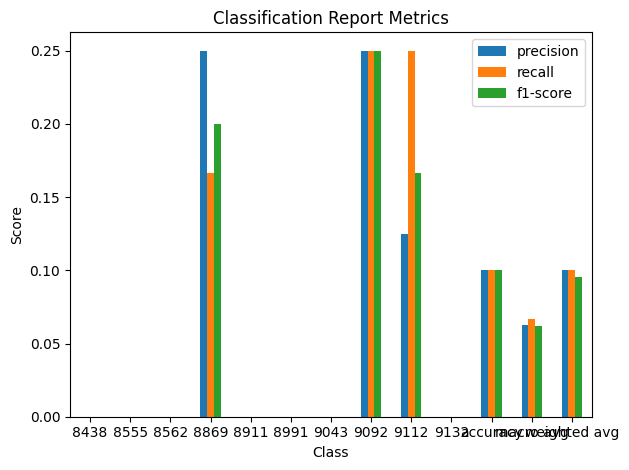

Regression RMSE: 18.3485072962353


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report

# Load the dataset
data = pd.read_csv("/content/sample.csv")

# Feature Engineering (Placeholder: Replace with your actual feature engineering)
# Create relevant features
data['Feature1'] = data['Total Price'] / data['Base Price']
data['Feature2'] = data['Units Sold'] * data['Base Price']

# Clustering
clustering_features = data[['Total Price', 'Base Price']]
range_clusters = range(2, 6)  # Reducing the range of clusters for faster results

best_silhouette = -1
best_num_clusters = 2

# Lists to store silhouette scores for plotting
silhouette_scores = []

# Parallelized K-Means clustering
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(clustering_features)
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_num_clusters = num_clusters

data['Cluster'] = kmeans.fit_predict(clustering_features)

# Feature engineering
data['Feature3'] = data['Total Price'] - data['Base Price']
data['Feature4'] = data['Units Sold'] / (data['Base Price'] + 1)
data['Feature5'] = data['Total Price'] / data['Units Sold']

# Model training for Regression
X_reg = data[['Feature3', 'Feature4', 'Feature5']]
y_reg = data['Units Sold']  # Replace with your target variable for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

reg_model = RandomForestRegressor(n_estimators=50, random_state=0)  # Tune the number of estimators
reg_model.fit(X_train_reg, y_train_reg)

# Predict demand using the regression model
y_pred_reg = reg_model.predict(X_test_reg)
reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# Model training for Classification
X_class = data[['Feature3', 'Feature4', 'Feature5']]
y_class = data['Store ID']  # Replace with your target variable for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

class_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Tune the number of estimators
class_model.fit(X_train_class, y_train_class)

# Classification Model
y_pred_class = class_model.predict(X_test_class)
class_report = classification_report(y_test_class, y_pred_class, output_dict=True)

# Visualize the classification report
report_df = pd.DataFrame(class_report).T

plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print(f"Regression RMSE: {reg_rmse}")
